<a href="https://colab.research.google.com/github/SeenaKhosravi/NASS/blob/main/NASS_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# Abstract

# Setup and Load Data

In [1]:
# Install required Python libraries
!pip install rpy2 matplotlib pandas

# Load rpy2 to run R code in the notebook
%load_ext rpy2.ipython

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%R

# Define required packages
required_packages <- c("data.table", "dplyr", "survey", "tidyverse", "tidycensus",
"ggplot2", "gridExtra","caret", "randomForest", "pROC", "broom", "lme4",
"gtsummary", "corrplot")

# Function to check and install missing packages
install_if_missing <- function(packages) {
  new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
  if(length(new_packages)) install.packages(new_packages)
}

# Function to load all required libraries
load_libraries <- function(packages) {
  lapply(packages, library, character.only = TRUE)
}

# Check and install missing packages, then load packages
install_if_missing(required_packages)
load_libraries(required_packages)
rm(required_packages, install_if_missing, load_libraries)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ tidyr::expand()      masks Matrix::expand()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ tidyr::pack()        masks Matrix::pack()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘wk’, ‘prodlim’, ‘rbibutils’, ‘V8’, ‘litedown’, ‘reactR’, ‘classInt’, ‘s2’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘Rdpack’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘minqa’, ‘numDeriv’, ‘mitools’, ‘RcppArmadillo’, ‘sf’, ‘tigris’, ‘units’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘recipes’, ‘reshape2’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘cards’, ‘gt’

trying URL 'https://cran.rstudio.com/src/contrib/listenv_0.9.1.tar.gz'
Content type 'application/x-gzip' length 36600 bytes (35 KB)
downloaded 35 KB

trying URL 'https://cran.rstudio.com/src/contrib/parallelly_1.43.0.tar.gz'
Content type 'application/x-gzip' length 310739 bytes (303 KB)
downloaded 303 KB

trying URL 'https://cran.rstudio.com/src

In [4]:
%%R

#Load NASS 2020 dataset

# 1. Check if file exists:
file_path <- "/content/drive/My Drive/NASS_2020_all.csv"
if (file.exists(file_path)) {
  print("File found!")
} else {
  stop("File not found. Exiting.")
}

# 2. Attempt to load using fread:
NASS_2020_all <- fread(file_path)

# 3. Verify data structure:
str(NASS_2020_all)
colnames(NASS_2020_all)

[1] "File found!"
Classes ‘data.table’ and 'data.frame':	7828310 obs. of  675 variables:
 $ KEY_NASS           : int  10000001 10000002 10000003 10000004 10000005 10000006 10000007 10000008 10000009 10000010 ...
 $ HOSP_NASS          : int  10446 10031 10145 10143 10326 10295 10202 10092 10357 10402 ...
 $ HOSP_TEACH         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HOSP_LOCATION      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HOSP_LOCTEACH      : int  3 3 3 3 3 3 3 3 3 3 ...
 $ HOSP_REGION        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HOSP_BEDSIZE_CAT   : int  1 3 3 3 3 3 3 3 2 2 ...
 $ DISCWT             : num  1.27 1.29 1.29 1.14 1.14 ...
 $ NASS_STRATUM       : int  40 58 58 33 33 58 33 33 40 40 ...
 $ N_DISC_U           : int  325943 381183 381183 658010 658010 381183 658010 658010 325943 325943 ...
 $ N_HOSP_U           : int  137 100 100 75 75 100 75 75 137 137 ...
 $ S_DISC_U           : int  256022 295908 295908 574998 574998 295908 574998 574998 256022 256022 ...
 $ S_HOSP_U           : int  105 7

|--------------------------------------------------|
|==================================================|
|--------------------------------------------------|
|==================================================|


# Dataset Overview

Exception ignored from cffi callback <function _processevents at 0x78f0375f65c0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 283, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 


In addition: Warning message:
In cor(NASS_2020_all[, 1:28], use = "complete.obs") :
  the standard deviation is zero


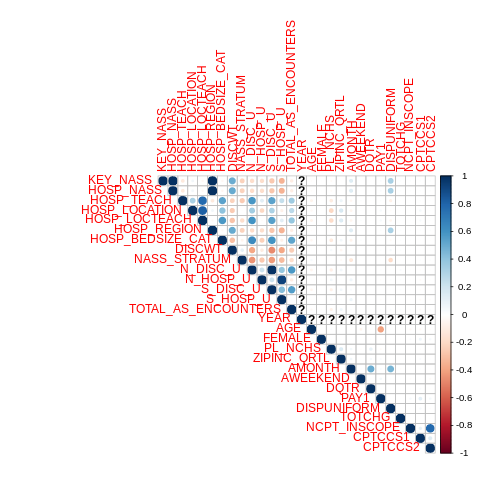

In [7]:
%%R

# Load necessary libraries
if (!requireNamespace("gtsummary", quietly = TRUE)) install.packages("gtsummary")
if (!requireNamespace("corrplot", quietly = TRUE)) install.packages("corrplot")
library(gtsummary)
library(corrplot)


# Output 1a: Summary of Dataset
NASS_2020_all[,1:28] %>% tbl_summary()

# Output 1b: Correlation matrix and plot
res <- cor(NASS_2020_all[,1:28], use = "complete.obs")
corrplot(res, type = "upper")


# Institutional Overview

# Encounter Overview

# Census Benchmarking

Note: 2020 decennial Census data use differential privacy, a technique that
introduces errors into data to preserve respondent confidentiality.
ℹ Small counts should be interpreted with caution.
ℹ See https://www.census.gov/library/fact-sheets/2021/protecting-the-confidentiality-of-the-2020-census-redistricting-data.html for additional guidance.
This message is displayed once per session.
[1] "Unadjusted proportion of WHITE: 0.721083861012147"
[1] "US Census White Only proportion: 0.572757871816601"

	1-sample proportions test with continuity correction

data:  sum(NASS_2020_all$WHITE) out of nrow(NASS_2020_all), null probability us_census_white_proportion
X-squared = 703813, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5727579
95 percent confidence interval:
 0.7207695 0.7213980
sample estimates:
        p 
0.7210839 

[1] "True proportion of WHITE in NASS states: 0.568354436990255"
[1] "Weighted proportion of WHITE in NASS 2020: 0.715839589166331"

	Desi

Your API key has been stored in your .Renviron and can be accessed by Sys.getenv("CENSUS_API_KEY"). 
To use now, restart R or run `readRenviron("~/.Renviron")`
Getting data from the 2020 decennial Census
Using the Demographic and Housing Characteristics File
Using the Demographic and Housing Characteristics File
Getting data from the 2020 decennial Census
Using the Demographic and Housing Characteristics File
Using the Demographic and Housing Characteristics File
In addition: Warning message:
• You have not set a Census API key. Users without a key are limited to 500
queries per day and may experience performance limitations.
ℹ For best results, get a Census API key at
http://api.census.gov/data/key_signup.html and then supply the key to the
`census_api_key()` function to use it throughout your tidycensus session.
This warning is displayed once per session. 


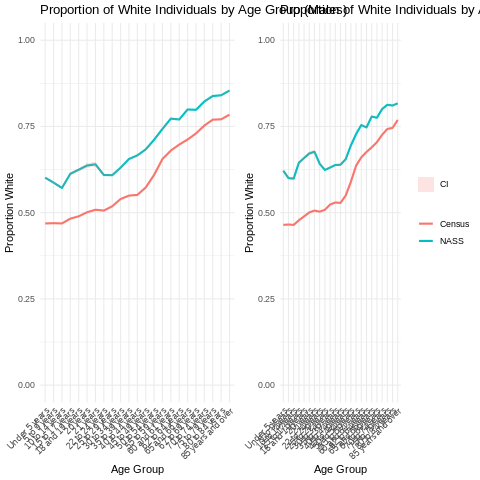

In [9]:
%%R

YOUR_CENSUS_API_KEY <- ""  # Replace with your actual Census API key

##########################
# Setup
##########################

# Set up your Census API key
census_api_key("YOUR_CENSUS_API_KEY", install = TRUE)

# List of states included in NASS_2020_all
states_in_nass <- c("Alaska", "California", "Colorado", "Connecticut", "District of Columbia", "Florida", "Georgia", "Hawaii", "Iowa",
                    "Illinois", "Indiana", "Kansas", "Kentucky", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "North Carolina",
                    "North Dakota", "Nebraska", "New Jersey", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "South Carolina",
                    "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Wisconsin")

# Import data for total population by state by age from the 2020 Census
# U.S. Census Bureau, U.S. Department of Commerce.
# 2020 Decennial Census, DHC-A

# Define a function to construct population variables and labels based on the desired base variable
# Base variable P12 for total, P12I for white alone, not Hispanic or Latino
# See https://api.census.gov/data/2020/dec/dhc/groups.html for available groups

# Define a function to construct population variables and labels based on the desired base variable
get_population_variables <- function(base_variable) {
  variables <- paste0(base_variable, "_", sprintf("%03dN", 1:49))

  labels <- c(
    "Total",
    "Male: Total",
    "Male: Under 5 years",
    "Male: 5 to 9 years",
    "Male: 10 to 14 years",
    "Male: 15 to 17 years",
    "Male: 18 and 19 years",
    "Male: 20 years",
    "Male: 21 years",
    "Male: 22 to 24 years",
    "Male: 25 to 29 years",
    "Male: 30 to 34 years",
    "Male: 35 to 39 years",
    "Male: 40 to 44 years",
    "Male: 45 to 49 years",
    "Male: 50 to 54 years",
    "Male: 55 to 59 years",
    "Male: 60 and 61 years",
    "Male: 62 to 64 years",
    "Male: 65 and 66 years",
    "Male: 67 to 69 years",
    "Male: 70 to 74 years",
    "Male: 75 to 79 years",
    "Male: 80 to 84 years",
    "Male: 85 years and over",
    "Female: Total",
    "Female: Under 5 years",
    "Female: 5 to 9 years",
    "Female: 10 to 14 years",
    "Female: 15 to 17 years",
    "Female: 18 and 19 years",
    "Female: 20 years",
    "Female: 21 years",
    "Female: 22 to 24 years",
    "Female: 25 to 29 years",
    "Female: 30 to 34 years",
    "Female: 35 to 39 years",
    "Female: 40 to 44 years",
    "Female: 45 to 49 years",
    "Female: 50 to 54 years",
    "Female: 55 to 59 years",
    "Female: 60 and 61 years",
    "Female: 62 to 64 years",
    "Female: 65 and 66 years",
    "Female: 67 to 69 years",
    "Female: 70 to 74 years",
    "Female: 75 to 79 years",
    "Female: 80 to 84 years",
    "Female: 85 years and over"
  )

  names(labels) <- variables
  labels <- as.character(labels)

  return(list(variables = variables, labels = labels))
}

# Function to get population data by state, age, and gender from the 2020 Census DHC file
get_population_data <- function(variables, labels) {
  population_data <- get_decennial(
    geography = "state",
    variables = variables,
    year = 2020,
    sumfile = "dhc"
  )

  # Replace variable codes with labels
  population_data <- population_data %>%
    mutate(variable = recode(variable, !!!setNames(labels, variables)))

  # Reshape the data for better analysis
  population_data <- population_data %>%
    pivot_wider(names_from = variable, values_from = value)

  return(population_data)
}

# Make total all vars for query
population_info <- get_population_variables("P12")

# Get the total population data by state, age, and gender
total_population_by_age_gender <- get_population_data(population_info$variables, population_info$labels)

# Make total white alone vars for query
population_info_w <- get_population_variables("P12I")

# Get the total population data by state, age, and gender
total_population_by_age_gender_white <- get_population_data(population_info_w$variables, population_info_w$labels)

########################################
# Stage 1a
# Unadjusted proportion of White individuals in the NASS 2020 data
# Reference value for White Only, (Not Hispanic or Latino) proportion for the whole US from the 2020 US Census
########################################

# Create a dummy variable WHITE which is 1 when RACE = 1, and 0 otherwise
NASS_2020_all[, WHITE := ifelse(RACE == 1, 1, 0)]

# Calculate the unadjusted proportion of WHITE
unadjusted_proportion_white <- mean(NASS_2020_all$WHITE)
print(paste("Unadjusted proportion of WHITE:", unadjusted_proportion_white))

# Reference value for White Only proportion for the whole US from the 2020 US Census
us_census_white_proportion <- sum(total_population_by_age_gender_white$Total) / sum(total_population_by_age_gender$Total)
print(paste("US Census White Only proportion:", us_census_white_proportion))

# Perform a simple statistical test for the unadjusted proportion
unadjusted_test <- prop.test(sum(NASS_2020_all$WHITE), nrow(NASS_2020_all), p = us_census_white_proportion)
print(unadjusted_test)


########################################
# Stage 1b
# Weighted proportion of White individuals in the NASS 2020 data set
# Reference value for White Only, (Not Hispanic or Latino) proportion for
# only NASS included states from the 2020 US Census
########################################

# Filter the census data for the states included in NASS
filtered_total_population <- total_population_by_age_gender %>%
  filter(NAME %in% states_in_nass)

filtered_white_population <- total_population_by_age_gender_white %>%
  filter(NAME %in% states_in_nass)

# Calculate the total population and the total white population for these states
total_population_nass_states <- sum(filtered_total_population$Total, na.rm = TRUE)
total_white_population_nass_states <- sum(filtered_white_population$Total, na.rm = TRUE)

# Calculate the true proportion of white individuals for these states
true_proportion_white_nass_states <- total_white_population_nass_states / total_population_nass_states
print(paste("True proportion of WHITE in NASS states:", true_proportion_white_nass_states))

# Calculate the weighted proportion of WHITE in NASS_2020_ALL using DISCWT
weighted_proportion_white <- svymean(~WHITE, design = svydesign(ids = ~KEY_NASS, weights = ~DISCWT, data = NASS_2020_all))
print(paste("Weighted proportion of WHITE in NASS 2020:", coef(weighted_proportion_white)))

# Perform a simple statistical test for the weighted proportion
weighted_test <- svyttest(WHITE ~ 1, design = svydesign(ids = ~KEY_NASS, weights = ~DISCWT, data = NASS_2020_all), mu = true_proportion_white_nass_states)
print(weighted_test)

########################################
# Stage 2 Analysis
# Break down the NASS 2020 data by age group, and compare the proportions of white individuals
# at each age, by gender. Show counts in NASS, and run a statistical test at each age bracket to
# determine if the NASS proportion of white individuals is significantly different from the Census proportion
########################################

# Define age groups and their corresponding breaks
age_breaks <- c(-Inf, 4, 9, 14, 17, 19, 20, 21, 24, 29, 34, 39, 44, 49, 54, 59, 61, 64, 66, 69, 74, 79, 84, Inf)
age_labels <- c("Under 5 years", "5 to 9 years", "10 to 14 years", "15 to 17 years", "18 and 19 years",
                "20 years", "21 years", "22 to 24 years", "25 to 29 years", "30 to 34 years",
                "35 to 39 years", "40 to 44 years", "45 to 49 years", "50 to 54 years", "55 to 59 years",
                "60 and 61 years", "62 to 64 years", "65 and 66 years", "67 to 69 years", "70 to 74 years",
                "75 to 79 years", "80 to 84 years", "85 years and over")

# Create age group variable in NASS dataset
NASS_2020_all <- NASS_2020_all %>%
  mutate(AGE_GROUP = cut(AGE, breaks = age_breaks, labels = age_labels, right = TRUE))

# Calculate proportions for NASS_2020_all with confidence intervals
nass_proportions <- NASS_2020_all %>%
  mutate(GENDER = ifelse(FEMALE == 0, "Male", "Female")) %>%
  group_by(AGE_GROUP, GENDER) %>%
  summarize(
    total = n(),
    white = sum(WHITE),
    proportion_white = white / total,
    ci_lower = proportion_white - 1.96 * sqrt((proportion_white * (1 - proportion_white)) / total),
    ci_upper = proportion_white + 1.96 * sqrt((proportion_white * (1 - proportion_white)) / total),
    .groups = 'drop'
  ) %>%
  filter(!is.na(proportion_white))

# Calculate proportions for Census data
census_proportions <- total_population_by_age_gender_white %>%
  select(NAME, starts_with("Male"), starts_with("Female")) %>%
  pivot_longer(cols = -NAME, names_to = "age_gender", values_to = "white_population") %>%
  separate(age_gender, into = c("gender", "age_group"), sep = ": ") %>%
  left_join(
    total_population_by_age_gender %>%
      select(NAME, starts_with("Male"), starts_with("Female")) %>%
      pivot_longer(cols = -NAME, names_to = "age_gender", values_to = "total_population") %>%
      separate(age_gender, into = c("gender", "age_group"), sep = ": "),
    by = c("NAME", "gender", "age_group")
  ) %>%
  group_by(gender, age_group) %>%
  summarize(
    total_population = sum(total_population, na.rm = TRUE),
    white_population = sum(white_population, na.rm = TRUE),
    proportion_white = white_population / total_population,
    .groups = 'drop'
  ) %>%
  filter(!is.na(age_group))

# Convert age groups to factors for proper plotting
nass_proportions$AGE_GROUP <- factor(nass_proportions$AGE_GROUP, levels = age_labels)
census_proportions$age_group <- factor(census_proportions$age_group, levels = age_labels)
census_proportions <- census_proportions %>% filter(!is.na(age_group))

# Plot the trends for males
plot_males <- ggplot() +
  geom_line(data = nass_proportions %>% filter(GENDER == "Male"), aes(x = AGE_GROUP, y = proportion_white, color = "NASS", group = 1), linewidth = 1) +
  geom_ribbon(data = nass_proportions %>% filter(GENDER == "Male"), aes(x = AGE_GROUP, ymin = ci_lower, ymax = ci_upper, fill = "CI", group = 1), alpha = 0.2) +
  geom_line(data = census_proportions %>% filter(gender == "Male"), aes(x = age_group, y = proportion_white, color = "Census", group = 1), linewidth = 1) +
  labs(title = "Proportion of White Individuals by Age Group (Males)",
       x = "Age Group",
       y = "Proportion White") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank(),
        legend.position = "none") +
  scale_y_continuous(limits = c(0, 1))

# Plot the trends for females
plot_females <- ggplot() +
  geom_line(data = nass_proportions %>% filter(GENDER == "Female"), aes(x = AGE_GROUP, y = proportion_white, color = "NASS", group = 1), linewidth = 1) +
  geom_ribbon(data = nass_proportions %>% filter(GENDER == "Female"), aes(x = AGE_GROUP, ymin = ci_lower, ymax = ci_upper, fill = "CI", group = 1), alpha = 0.2) +
  geom_line(data = census_proportions %>% filter(gender == "Female"), aes(x = age_group, y = proportion_white, color = "Census", group = 1), linewidth = 1) +
  labs(title = "Proportion of White Individuals by Age Group (Females)",
       x = "Age Group",
       y = "Proportion White") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank(),
        legend.position = "right") +
  scale_y_continuous(limits = c(0, 1))

# Display the plots side by side
grid.arrange(plot_males, plot_females, ncol = 2)


# Procedure Code Analysis

# ML Race Classifier Analysis

# ML Rural-Urban Classifier Analysis

# Appendix A: Time Series of 2020 Volumes

# Appendix B: Age Progression of Surgical Cases

# Appendix C: Indexing of Case Variety and Patient Diversity vs. Government Payment Mix

# Academic Poster Output